## Fa2020 CSE258 HW1
Name: Tzu-Han Cheng

PID: A53238806

email: tzcheng@ucsd.edu

In [1]:
import numpy        # linear algebra
import urllib.request # load data from the web
import scipy.optimize # optimization routines
import random         # random number generation
import ast
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics # confusion matrix, MSE etc.

In [2]:
def parseData(fname):
  for l in urllib.request.urlopen(fname):
    yield eval(l)

In [3]:
def parseDataFromFile(fname):
  for l in open(fname):
    #yield eval(l)
    yield ast.literal_eval(l)

In [4]:
def getlen(datum):
  textlen = len(datum)
  return textlen

In [5]:
def getMSE(theta, X, y):
    predict = theta*X
    predict = numpy.array(predict)
    predict = predict.sum(axis=1)
    error = sum((y - predict)**2)
    MSE = 1/len(y)*error
    return MSE

In [6]:
data = list(parseDataFromFile
            ("/Users/t.z.cheng/Google_Drive/Coursework/CSE258/HW/fantasy_10000.json"))

In [7]:
## Get x and y
length = [getlen(d['review_text']) for d in data]
length = numpy.array(length)/max(length) # normalize the feature 
y = [d['rating'] for d in data]

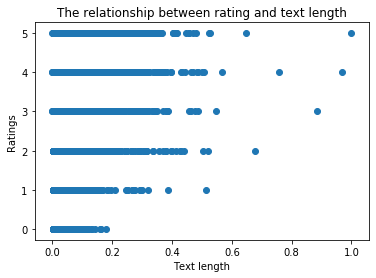

In [8]:
## Visualize the data
plt.scatter(length, y)
plt.title('The relationship between rating and text length')
plt.xlabel('Text length')
plt.ylabel('Ratings')
plt.show()

### Q2

In [9]:
def feature(datum):
  return [1, datum]

In [10]:
X = [feature(l) for l in length]

In [11]:
theta,residuals,rank,s = numpy.linalg.lstsq(X, y, rcond=None)

In [12]:
print('Theta:',theta)
print('MSE:',getMSE(theta, X, y))

Theta: [3.68568136 0.98335392]
MSE: 1.5522086622355353


In [ ]:
## Checking the results with LinearRegression and mean_squared_error in scikit learn
# regr = linear_model.LinearRegression()
## Train the model using the training sets
# regr.fit(XX, y)
# pred = regr.predict(XX)
# print('Coefficients: \n', regr.coef_)
# print(metrics.mean_squared_error(y, pred))

### Q3


In [13]:
## Get number of comments
ncomments = [d['n_comments'] for d in data]

In [14]:
XX = numpy.insert(X, 2, ncomments,axis=-1)

In [15]:
theta,residuals,rank,s = numpy.linalg.lstsq(XX, y, rcond=None)

In [16]:
print('Theta:',theta)
print('MSE:',getMSE(theta, XX, y))

Theta: [ 3.68916737  1.08497776 -0.03279289]
MSE: 1.5498351692774626


$ \theta_{1} $ is different because the model considers another features, thus the result is conditional. 

### Q4

In [17]:
## degree 1
def feature(datum):
  return [1, datum]
X_n1 = [feature(l) for l in length]
X_n1 = numpy.array(X_n1, dtype='float')
theta,residuals,rank,s = numpy.linalg.lstsq(X_n1, y, rcond=None)
print('Theta:',theta)
print('MSE:',getMSE(theta, X_n1, y))

Theta: [3.68568136 0.98335392]
MSE: 1.5522086622355353


In [18]:
## degree 2
def feature(datum):
  return [1, datum, datum**2]
X_n2 = [feature(l) for l in length]
X_n2 = numpy.array(X_n2, dtype='float')
theta,residuals,rank,s = numpy.linalg.lstsq(X_n2, y, rcond=None)
print('Theta:',theta)
print('MSE:',getMSE(theta, X_n2, y))

Theta: [ 3.65975869  1.8395413  -2.62503319]
MSE: 1.5506567696339422


In [19]:
## degree 3
def feature(datum):
  return [1, datum, datum**2, datum**3]
X_n3 = [feature(l) for l in length]
X_n3 = numpy.array(X_n3, dtype='float')
theta,residuals,rank,s = numpy.linalg.lstsq(X_n3, y, rcond=None)
print('Theta:',theta)
print('MSE:',getMSE(theta, X_n3, y))

Theta: [ 3.63659658  2.8884065  -8.48042966  6.12504475]
MSE: 1.5497985323805499


In [20]:
## degree 4
def feature(datum):
  return [1, datum, datum**2, datum**3, datum**4]
X_n4 = [feature(l) for l in length]
X_n4 = numpy.array(X_n4, dtype='float')
theta,residuals,rank,s = numpy.linalg.lstsq(X_n4, y, rcond=None)
print('Theta:',theta)
print('MSE:',getMSE(theta, X_n4, y))

Theta: [  3.64736873   2.20419719  -1.80763945 -11.6451833   12.21844408]
MSE: 1.549629132452472


In [21]:
## degree 5
def feature(datum):
  return [1, datum, datum**2, datum**3, datum**4, datum**5]
X_n5 = [feature(l) for l in length]
X_n5 = numpy.array(X_n5, dtype='float')
theta,residuals,rank,s = numpy.linalg.lstsq(X_n5, y, rcond=None)
print('Theta:',theta)
print('MSE:',getMSE(theta, X_n5, y))

Theta: [  3.6441158    2.47396326  -5.65441081   5.55309592 -15.94637484
  14.68100179]
MSE: 1.549614202329866


### Q5

In [22]:
# degree 1 
ninsert = 2
dataset1 = numpy.insert(X_n1, ninsert, y, axis=-1) # Create dataset
# print('Original data',dataset1)
random.shuffle(dataset1) # Shuffle
# print('Shuffled data',dataset1)
X = [values[:-1] for values in dataset1] # extract X
y = [values[-1] for values in dataset1] # extract y

In [23]:
# Get training and testing subsets
N = len(y)
X_train = numpy.array(X[:N//2], dtype='float') # force N//2 to be integer
X_test = numpy.array(X[N//2:], dtype='float')
y_train = numpy.array(y[:N//2], dtype='float')
y_test = numpy.array(y[N//2:], dtype='float')

In [24]:
for i in range(1,6):
    tmptrain = numpy.array(X_train[:,i])**(i)
    X_train = numpy.insert(X_train,(i+1),tmptrain,axis=-1)
    tmptest = numpy.array(X_test[:,i])**(i)
    X_test = numpy.insert(X_test,(i+1),tmptest,axis=-1)
    theta,residuals,rank,s = numpy.linalg.lstsq(X_train, y_train, rcond=None)
    print('Theta:',theta)
    print('MSE of training set:',getMSE(theta, X_train, y_train))
    print('MSE of testing set:',getMSE(theta, X_test, y_test))

Theta: [3.72558306 0.81043483 0.81043483]
MSE of training set: 1.394225629393576
MSE of testing set: 1.4203777890339226
Theta: [3.73569032 0.63559642 0.63559642 1.29187051]
MSE of training set: 1.3940983311455524
MSE of testing set: 1.4221407233510488
Theta: [  3.74207287   0.49528585   0.49528585   2.72115267 -21.24246732]
MSE of training set: 1.3939790012993378
MSE of testing set: 1.4611627186291336
Theta: [ 3.74058675e+00  5.31725640e-01  5.31743212e-01  2.29072819e+00
 -6.57191530e+00 -6.15463720e+05]
MSE of training set: 1.3939286370997277
MSE of testing set: 15509813.505049543
Theta: [ 3.74058675e+00  5.31725622e-01  5.31743230e-01  2.29072819e+00
 -6.57191530e+00 -6.15463720e+05 -2.07236738e-18]
MSE of training set: 1.3939286370997277
MSE of testing set: 15509813.505049549


### Q6

Equation of MSE:
$ f(\theta) = \frac{1}{N}\sum \limits _{i = 1} ^{N}(x_{i}\theta - y_{i})^{2} $ 

Derivative of MSE:    $ \frac{\partial f}{\partial \theta} = \frac{-2}{N}\sum \limits _{i = 1} ^{N}x_{i}(y_{i}-x_{i}\theta) $

Set derivative to 0 to get the min

$ \frac{-2}{N}\sum \limits _{i = 1} ^{N}x_{i}(y_{i}-x_{i}\theta) = 0 $


As a trivial predictor $ y = \theta_{0} $, $x_{i} = 1$, and -2 is just an constant which could be neglected here, therefore

$ \frac{-2}{N}\sum \limits _{i = 1} ^{N}x_{i}(y_{i}-x_{i}\theta_{0}) = \frac{1}{N}\sum \limits _{i = 1} ^{N}(1)(y_{i}-1(\theta_{0}) = 0 $


$\frac{\sum \limits _{i = 1} ^{N}(y_{i})}{N}-\frac{N\theta_{0}}{N} = 0$

$\frac{\sum \limits _{i = 1} ^{N}(y_{i})}{N} = \frac{N\theta_{0}}{N} $

$\bar{y} = \theta_{0}$


### Q7

In [25]:
data = list(parseData("https://cseweb.ucsd.edu/classes/fa20/cse258-a/data/beer_50000.json"))

In [27]:
## Check if 'user/gender' only take Female and Male
# data1 = [d for d in data if 'user/gender' in d and d['user/gender'] == 'Female']
# data2 = [d for d in data if 'user/gender' in d and d['user/gender'] == 'Male']
# print(len(data1))
# print(len(data2))

In [28]:
# Filter the data that includes specified gender
data = [d for d in data if 'user/gender' in d]
print(len(data))

20403


In [29]:
reviewlength = [getlen(d['review/text']) for d in data]
y = [d['user/gender'] for d in data]
y = numpy.array(y)

In [30]:
def feature(datum):
  return [1, datum]

In [31]:
x = [feature(l) for l in reviewlength]

In [32]:
# Logistic regression classifier
model = linear_model.LogisticRegression(C=1.0)
model.fit(x,y)
pred = model.predict(x)

In [44]:
# cm = metrics.confusion_matrix(y, pred)
# print(cm)
# TP|FN
# FP|TN

In [34]:
# True Positive, True Negative, False Positive, False Negative
TP_ = numpy.logical_and(y == 'Female', pred == 'Female')
FP_ = numpy.logical_and(y == 'Male', pred == 'Female')
TN_ = numpy.logical_and(y == 'Male', pred == 'Male')
FN_ = numpy.logical_and(y == 'Female', pred == 'Male')

In [35]:
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)
print('TP:',TP)
print('FP:',FP)
print('TN:',TN)
print('FN:',FN)

TP: 0
FP: 0
TN: 20095
FN: 308


In [36]:
correct = y == pred

In [45]:
# Accuracy
accuracy = sum(correct) / len(correct)
accuracy = (TP + TN) / (TP + FP + TN + FN)

In [38]:
# Balanced error rate
BER = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
print('BER:',BER)

BER: 0.5


### Q8

In [39]:
# Retrain logistic regression classifier
model = linear_model.LogisticRegression(C=1.0,class_weight='balanced')
model.fit(x,y)
pred = model.predict(x)

In [40]:
TP_ = numpy.logical_and(y == 'Female', pred == 'Female')
FP_ = numpy.logical_and(y == 'Male', pred == 'Female')
TN_ = numpy.logical_and(y == 'Male', pred == 'Male')
FN_ = numpy.logical_and(y == 'Female', pred == 'Male')
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)
print('TP:',TP)
print('FP:',FP)
print('TN:',TN)
print('FN:',FN)
BER = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
print('BER:',BER)

TP: 199
FP: 11672
TN: 8423
FN: 109
BER: 0.4673685545606422


### Q9

In [41]:
extra_feature = [d['review/taste'] for d in data]
xx = numpy.insert(x, 2, extra_feature,axis=-1)

In [42]:
# Retrain logistic regression classifier
model = linear_model.LogisticRegression(C=1.0,class_weight='balanced')
model.fit(xx,y)
pred = model.predict(xx)

In [43]:
TP_ = numpy.logical_and(y == 'Female', pred == 'Female')
FP_ = numpy.logical_and(y == 'Male', pred == 'Female')
TN_ = numpy.logical_and(y == 'Male', pred == 'Male')
FN_ = numpy.logical_and(y == 'Female', pred == 'Male')
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)
BER = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
print('BER:',BER)

BER: 0.4607541127695395
